<img align="center" style="max-width: 1000px" src="https://raw.githubusercontent.com/HSG-AIML-Teaching/AI2024-Lab/main/banner.png?raw=1">

<img align="right" style="max-width: 200px; height: auto" src="https://raw.githubusercontent.com/HSG-AIML-Teaching/AI2024-Lab/main/hsg_logo.png?raw=1">

##  Lab 03 - "Problem Solving and Search"

Artificial Intelligence (Spring 2024), University of St. Gallen


In this lab course, we will explore the fundamentals of search algorithms that empower many artificial intelligence applications, focusing on their principles, functionalities, and differences

Objectives:

* Understand the concept of problem-solving in the context of artificial intelligence. This includes defining a problem, understanding problem space, and identifying goal states.
* Familiarize with search strategies used in AI for problem-solving. This will cover both uninformed (blind) search strategies and informed (heuristic) search strategies.
* Implement basic search algorithms such as Depth-First Search (DFS), Breadth-First Search (BFS), Greedy Search, and A* Search.

### Introduction to Problem Solving and Search

Problem-solving forms the core of artificial intelligence. It is about finding solutions to complex problems through intelligent search techniques. At the heart of problem-solving is the concept of the search space, which represents all possible states that can be reached from the initial state by applying a series of actions. The efficiency of solving a problem in AI greatly depends on the strategy used to search through the state space to find a goal state. Search strategies can be broadly classified into two categories: uninformed (or blind) search and informed (or heuristic) search:
* Uninformed search strategies do not have additional information about the state space or the goal. They explore the search space blindly. Examples include Depth-First Search (DFS) and Breadth-First Search (BFS).
* Informed search strategies, on the other hand, use heuristic information to guide the search process towards the goal more efficiently. A* Search is a prime example of an informed search strategy.

### Part 1: Creating and Displaying a Graph with NetworkX

In the first part, we'll begin by creating a graph that will be used in subsequent sections to demonstrate various search algorithms. A graph consists of nodes or vertices (representing the entities in the system) that are connected by edges (representing relationships between those entities). Working with graphs is a function of navigating edges and nodes to discover and understand complex relationships and/or optimize paths between linked data in a network.



#### Introduction to NetworkX

We'll use Python alongside the [NetworkX](https://pypi.org/project/networkx/) library, a powerful tool designed for the creation, manipulation, and analysis of graphs and complex network structures. NetworkX is versatile, supporting a wide range of graph types such as directed, undirected, multi-graphs, and those with weighted edges, making it ideal for studying the structure, dynamics, and functions of complex networks. 

In this lab, our focus with NetworkX will be specifically on creating and visualizing the graph to better understand its structure and relationships. If you're interested, a tutorial on networkx can be found at:
* <https://networkx.github.io/documentation/stable/tutorial.html>

If you haven't installed NetworkX yet, you can do so by running the following command in your notebook:

In [ ]:
#!pip install networkx

In [2]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

#### Creating a Graph
We start by instantiating a `nx.Graph` class that encapsulates the functionality for creating a graph and populating it.

Key Components:

* NetworkX Graph Creation: We start by creating an instance of a graph using NetworkX's Graph class. This graph is undirected, meaning the edges do not have a direction. NetworkX nodes can be any object that is hashable, meaning that its value never changes (e.g.: text strings)
* Adding Edges: We define the connections between nodes (i.e., the edges of the graph) using the `add_edges_from()` method. These edges determine the structure of the graph.

#### Initializing and Populating a Graph

It's time to initialize and populate a Graph with nodes and edges. This process involves creating an instance of a Graph class and then adding edges to it. Each edge implies the addition of the nodes it connects if they are not already present in the graph. 

In [3]:
# Create an undirected graph
G = nx.Graph()

# Add edges between nodes. Edges are tuples: (source, target)
G.add_edges_from([
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'D'),
    ('C', 'E'),
    ('D', 'E'),
    ('D', 'F'),
    ('E', 'F'),
])

We will create a function to visualise the graph, and optionnally highlight the list of edges in the paths chosen by the algorithm. This will be particularly useful for illustrating algorithms that navigate graphs by visually emphasizing the paths they take.

Main keypoints:

* Visualization: The `visualize_graph()` method utilizes Matplotlib to draw the graph. It positions nodes using a spring layout for aesthetic spacing, draws nodes and edges, and optionally highlights specific paths in the graph by coloring those edges differently.

* Path Highlighting: By passing a list of edges to `visualize_graph()`, we can highlight specific paths through the graph, which is particularly useful for visualizing the execution of graph algorithms like BFS or DFS.

In [6]:
def visualize_graph(graph, traversal_edges=None):
    pos = nx.spring_layout(graph, seed=4)  # Node positions

    # Draw nodes and their labels
    nx.draw_networkx_nodes(graph, pos, node_size=700)
    nx.draw_networkx_labels(graph, pos, font_size=12)

    # Draw all edges in gray as the base layer
    nx.draw_networkx_edges(graph, pos, width=6, alpha=0.5, edge_color="gray")

    # Draw edge labels for weights/distances if present
    edge_weights = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_weights)

    # If traversal edges with order are provided, highlight and label them accordingly
    if traversal_edges:
        edge_labels_with_order = { (edge[0], edge[1]): edge[2] for edge in traversal_edges }
        highlighted_edges = [(edge[0], edge[1]) for edge in traversal_edges]

        # Highlight traversal edges with blue color
        nx.draw_networkx_edges(graph, pos, edgelist=highlighted_edges, width=2, edge_color='blue')

        # Annotate the highlighted edges with their traversal order
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels_with_order, font_color='red')

    plt.axis('off')
    plt.show()

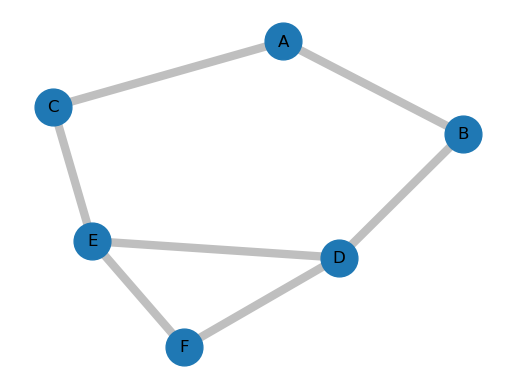

In [7]:
# Visualize the graph
visualize_graph(G)

And here is another example, for a tree-like structure. A tree is just a special type of graph that is connected and acyclic, with one node designated as the root. Every other node is connected to exactly one parent node

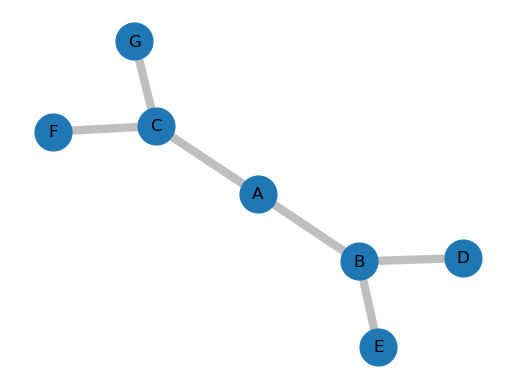

In [8]:
# Define a simple acyclic, connected graph (which is inherently a tree)
T = nx.Graph()

# Add edges between cities. Edges are tuples: (source, target, {'cost': x, 'time': y})
T.add_edges_from([
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'D'),
    ('B', 'E'),
    ('C', 'F'),
    ('C', 'G'),
])


# Visualize the tree
visualize_graph(T)

### Part 2: Breadth-First Search (BFS) to Traverse a Graph in Python

In this section, we'll explore the implementation of the Breadth-First Search (BFS) algorithm in Python, applied to a graph data structure. BFS is an algorithm for traversing a tree or graph data structures. It starts at a chosen node of a graph and explores the nearest neighbors first, before moving to the next level neighbors.

We will first use a queue to keep track of the nodes that need to be explored and a set to keep track of the visited nodes to avoid revisiting them. 

* A queue is a First-In-First-Out (FIFO) data structure, meaning the first element added to the queue will be the first one to be removed. This property makes queues ideal for scenarios where you need to process elements in the exact order they were added. In BFS, you explore all the neighbors of a node before moving on to the neighbors of those neighbors. By using a queue, you can ensure that nodes are explored in the order they are discovered, allowing for a level-by-level traversal of the graph, making sure you check all the neighbors before diving deeper.

For that we will use `deque`, from the `collections` module. It is designed to allow fast appends and pops from both ends of the queue. `deque` is used to efficiently manage the queue of nodes to be visited, allowing for fast enqueueing (append) of newly discovered nodes 

In [11]:
from collections import deque

Starting from a specified node, the algorithm explores each of its unvisited neighbors. This process continues until all reachable nodes from the starting node have been visited, following the BFS strategy of visiting nodes level by level. Moreover, we will also keep track of the order in which edges are traversed. This is particularly useful for understanding the traversal process in detail. 

In [9]:
def bfs(graph, start):
    # Initialize the visited set with the start node to avoid revisiting it
    visited = set([start])
    # Initialize the queue with the starting node
    queue = deque([start])
    # Optional: Initialize an empty list to keep track of the traversal edges
    traversal_edges = []
    # Optional: Initialize a counter for the order of traversal
    order = 1

    # Loop continues as long as there are nodes left to explore in the queue
    while queue:
        # Dequeue the current node to explore its neighbors
        current_node = queue.popleft()
        # Iterate over each neighbor of the current node
        neighbours = graph[current_node]
        for neighbour in neighbours:
            # Check if the neighbor has not been visited to avoid redundant exploration
            if neighbour not in visited:
                # Mark the neighbour as visited to avoid revisiting

                # Add the neighbor to the queue for future exploration

                # Record the traversed edge along with its traversal order.
                traversal_edges.append((current_node, neighbour, order))
                # Increment the order after adding an edge
                order += 1

    # Return the list of traversal edges after visiting all reachable nodes, with their traversal order
    return traversal_edges

In [12]:
# Example of BFS traversal from node 'A'
bfs_path = bfs(G, 'A')

print("BFS Traversal starting from 'A':")
print(bfs_path)

BFS Traversal starting from 'A':
[('A', 'B', 1), ('A', 'C', 2), ('B', 'D', 3), ('C', 'E', 4), ('D', 'F', 5)]


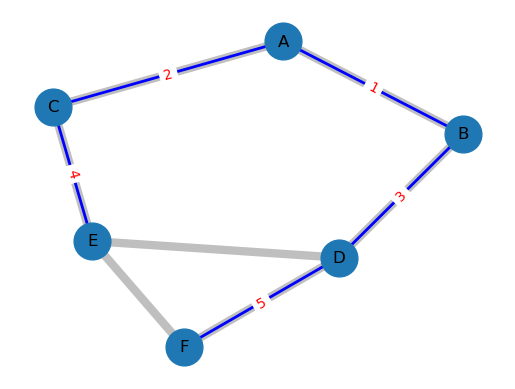

In [13]:
# BFS path visualization
visualize_graph(G, bfs_path)

### Part 3: Depth-First Search (DFS) to Traverse a Graph in Python

Now, we'll explore the implementation of the Depth-First Search (DFS) algorithm in Python, applied to a graph data structure. It differs from BFS in its approach to node exploration. While BFS explores the graph level by level, starting from the nearest nodes and gradually moving to farthest, DFS dives as deep as possible into the graph's branches before backtracking.


To efficiently execute DFS, we'll utilize a stack to keep track of the nodes yet to be explored and a set to remember which nodes have been visited.

* A stack is a Last-In-First-Out (LIFO) data structure, where the most recently added element is the first to be removed. This characteristic is crucial for DFS's backtracking approach, allowing us to dive deep into one path, hit the end, and then backtrack to explore different paths. Using a stack, we can manage our exploration efficiently, always moving forward to unvisited nodes until we need to backtrack. 

In [15]:
def dfs(graph, start):
    # Initialize the visited set with the start node to avoid revisiting it
    visited = set()
    # Initialize the queue with the starting node
    stack = deque([(start, None)])
    # Optional: Initialize an empty list to keep track of the traversal edges
    traversal_edges = []
    # Optional: Initialize a counter for the order of traversal
    order = 1

    # Loop continues as long as there are nodes left to explore in the queue
    while stack:
        # Dequeue the current node to explore its neighbors
        current_node, parent = stack.pop()  # == pop right()

        if current_node in visited:
            continue

        visited.add(current_node)

        if parent is not None:
            # Add edge with traversal order
            traversal_edges.append((parent, current_node, order))
            order += 1  # Increment the order

        # Convert to list and then reverse
        neighbours = reversed(list(graph[current_node]))

        # Add the neighbor to the queue for future exploration



    # Return the list of traversal edges after visiting all reachable nodes, with their traversal order
    return traversal_edges

In [16]:
# Example of DFS traversal from node 'A'
dfs_path = dfs(G, 'A')
print("DFS Traversal starting from 'A':")
print(dfs_path)

DFS Traversal starting from 'A':
[('A', 'B', 1), ('B', 'D', 2), ('D', 'E', 3), ('E', 'C', 4), ('E', 'F', 5)]


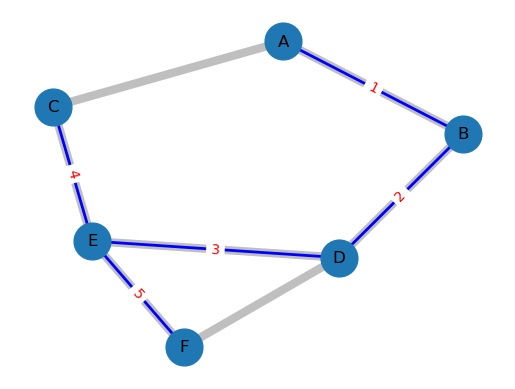

In [17]:
# DFS path visualization
visualize_graph(G, dfs_path)

## Part 4: Solving a Problem with A* and Greedy Search Algorithms

In this section, we'll tackle a problem using two informed search strategies: A* (A Star) and Greedy Search. Both algorithms use heuristics to guide the search towards the goal, making them more efficient than uninformed search strategies for many problems.
#### Uninformed vs Informed (heuristic) Search
(ref: https://www.youtube.com/watch?v=71CEj4gKDnE&t)
<img align="center" style="max-width: 1000px" src="uninformed-vs-informed.png">


#### Problem Definition: Traveling in Switzerland - From St.Gallen to Lausanne
Imagine we're planning a trip through Switzerland, aiming to visit several cities. Our goal is to minimize travel cost or time. We have a map of cities connected by roads with associated travel costs (in CHF) and travel times (in mins).

Let's define a simplified version of this problem with a few cities and solve it using A* and Greedy search to find the most cost-effective and then the quickest route from a start city to a destination city.


* For simplicity, we will define a straightforward heuristic function based on simplified assumptions, as we don't have the exact distances or costs between all cities. A common heuristic for geographical paths is the straight-line distance, so we can use the distance "as the crow flies" as a proxy. 

#### Setup for Solving the Problem
We'll use the NetworkX library for graph operations and matplotlib for visualization, as introduced in previous sections.

First, let's define our graph representing the map of Switzerland:

In [18]:
# Create an undirected graph
G = nx.Graph()

# Add edges between cities. Edges are tuples: (source, target, {'cost': x, 'time': y})
G.add_edges_from([
    ('St. Gallen', 'Zurich', {'cost': 30, 'time': 60}),
    ('St. Gallen', 'Lucerne', {'cost': 120, 'time': 75}),
    ('Zurich', 'Lucerne', {'cost': 50, 'time': 45}),
    ('Zurich', 'Bern', {'cost': 75, 'time': 60}),
    ('Lucerne', 'Bern', {'cost': 20, 'time': 30}),
    ('Lucerne', 'Geneva', {'cost': 100, 'time': 150}),
    ('Bern', 'Geneva', {'cost': 50, 'time': 100}),
    ('Bern', 'Lausanne', {'cost': 40, 'time': 60}),
    ('Lausanne', 'Geneva', {'cost': 30, 'time': 40}),
    ('Zurich', 'Basel', {'cost': 60, 'time': 53}),
    ('Basel', 'Bern', {'cost': 50, 'time': 75}),
    ('Lausanne', 'Zurich', {'cost': 110, 'time': 130})
])

Now let's define our heuristic. Remember, it's the straight line distance between Lausanne (our goal) and all other cities. 

In [19]:
distancesToLausanne = {
    'St. Gallen': 231,
    'Zurich': 173,
    'Lucerne': 140,
    'Bern': 78,
    'Basel': 136,
    'Geneva': 51,
    'Lausanne': 0
}

In [15]:
# Visualize the graph
def visualize_path(G, path=None, title=""):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=4)  # Consistent layout
    # draw the nodes
    nx.draw(G, pos, with_labels=True, node_size=2500, node_color="lightblue", font_size=10, font_weight="bold")

    # Add the heuristic as a node label. It's the distance from Lausanne to each other cities, as the crow flies.
    labels = {node: f"\n\n\n{distancesToLausanne[node]}km" for idx, node in enumerate(list(G.nodes))}
    nx.draw_networkx_labels(G, pos, labels, font_size=7)
    if path:
        nx.draw_networkx_edges(G, pos, edgelist=list(zip(path, path[1:])), width=8, alpha=0.5, edge_color="red")
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['cost']} CHF, {d['time']}min" for u, v, d in G.edges(data=True)}, font_color='green')
    plt.title(title)
    plt.show()

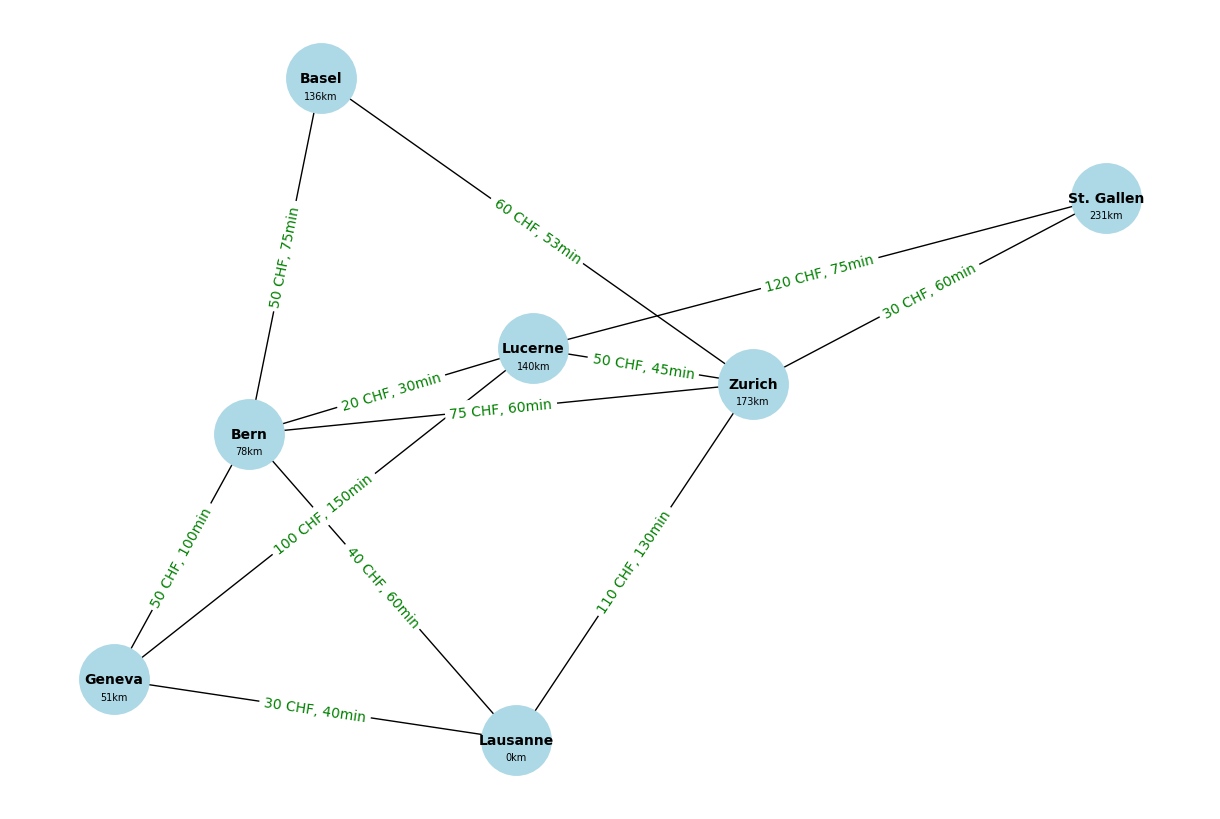

In [16]:
visualize_path(G)

### 4.1 Greedy Search

Greedy Search algorithm selects the path that appears best at that moment. It's "greedy" because it chooses the next step that offers the most immediate benefit.

Here's how we can implement Greedy search:

In [17]:
def greedy_search(G, start, goal, heuristicMap):
    # Initialize a set to keep track of visited nodes to avoid revisiting them.
    visited = set()

    # Initialize an empty list to store the path from the start node to the goal node.
    path = []

    # Set the current node to the start node.
    current = start

    # Continue searching until the goal node is reached.
    while current != goal:
        # Mark the current node as visited.
        visited.add(current)
        # Add the current node to the path list.
        path.append(current)

        # Collect all unvisited neighbors of the current node and their associated attribute (costs or times).
        neighbors = [(neighbor, heuristicMap[neighbor]) for neighbor in G.neighbors(current) if neighbor not in visited]

        # Choose the neighbor with the minimum cost or time (based on the specified attribute) as the next current node.
        current = min(neighbors, key=lambda x: x[1])[0]

    # After reaching the goal, add the goal node to the path list.
    path.append(goal)

    # Return the list of nodes representing the path from the start to the goal.
    return path

#### Visualizing the Paths
To visualize the paths on the graph, we'll use a function that highlights the chosen paths:

In [18]:
def compute_path_cost(graph, path, attribute='cost'):
    costs = []
    for idx in range(len(path) - 1):
        start_node = path[idx]
        end_node = path[idx + 1]
        cost = graph[start_node][end_node][attribute]
        costs.append(cost)
    return sum(costs)

In [19]:
# Chosen path based on straight line air-distance to Lausanne
best_greedy_path = greedy_search(G, 'St. Gallen', 'Lausanne', distancesToLausanne)
print("Chosen Path:", best_path)
print(f"Resulting costs: {compute_path_cost(G, best_greedy_path, 'cost')} CHF, {compute_path_cost(G, best_greedy_path, 'time')} mins")

Chosen Path: ['St. Gallen', 'Lucerne', 'Geneva', 'Lausanne']
Resulting costs: 250 CHF, 265 mins


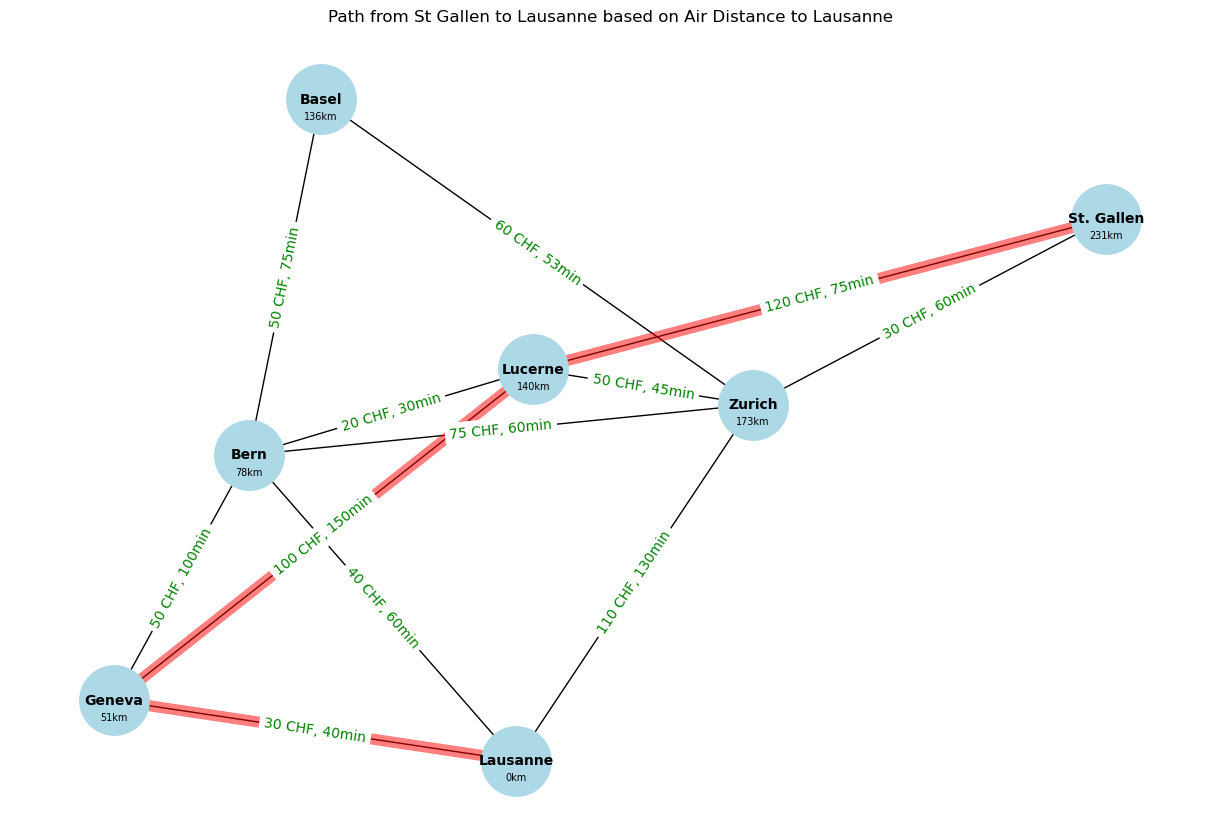

In [21]:
# Visualize the path based on cost
visualize_path(G, best_greedy_path, "Path from St Gallen to Lausanne based on Air Distance to Lausanne")

It's important to note that the Greedy Search algorithm doesn't guarantee the optimal path since it makes decisions based solely on immediate local optimization without considering the entire path to the goal.

### 4.2 A* Search

To solve the problem of travelling from St. Gallen to Lausanne using the A* search algorithm, we will implement the algorithm focusing on both cost and time as metrics. A* search is an informed search algorithm that uses both the cost (in CHF or minutes) to reach the node and a heuristic estimate of the cost to get from the node to the goal. 

#### Introduction to heapq

For implementing the A* search algorithm efficiently, we use the [heapq](https://docs.python.org/3/library/heapq.html#module-heapq) package, a Python library that provides an easy-to-use interface for a priority queue. [heapq](https://docs.python.org/3/library/heapq.html#module-heapq) is used to maintain a frontier of nodes to be explored, sorted by their priority, which is typically the cost to reach the node plus a heuristic estimate of the cost from that node to the goal.

[heapq](https://docs.python.org/3/library/heapq.html#module-heapq) turns a regular Python list into a heap with functions like `heappush` to add items and `heappop` to remove and return the smallest item. This makes it efficient to always extract the node with the lowest cost + heuristic value from the frontier, ensuring that A* search explores the most promising nodes first. This efficiency is crucial for the performance of the algorithm, especially in large graphs. 


In [22]:
import heapq

In [23]:
def a_star_search(G, start, goal, heuristicMap, attribute='cost'):

    # Initialize the priority queue with the start node and its cost information
    # The queue stores tuples of (estimated total cost, actual cost so far, current node, path taken)
    frontier = [(0, 0, start, [start])]

    # Initialize a set to track visited nodes
    visited = set()

    while frontier:
        # heapq returns the entry with the smallest cost + heuristic - extract this node
        current_cost_plus_heuristic, current_cost, current, path = heapq.heappop(frontier)

        # Check if the goal has been reached and return the path and its cost
        if current == goal:
            return path, current_cost

        # Skip processing if the node has already been visited
        if current in visited:
            continue

        # Mark the current node as visited
        visited.add(current)

        # Explore neighbors and update their costs in the priority queue
        for neighbor in G.neighbors(current):
            if neighbor not in visited:
                # Calculate new cost considering the current node
                new_cost = current_cost + G[current][neighbor][attribute]
                # Calculate the heuristic
                heuristic = heuristicMap[neighbor]
                # Update the neighbor in the priority queue with its new total cost and path
                heapq.heappush(frontier, (new_cost + heuristic, new_cost, neighbor, path + [neighbor]))

    return None, 0  # In case there is no path

In [24]:
# Finding the path by cost
path_by_cost, cost_by_cost = a_star_search(G, 'St. Gallen', 'Lausanne', distancesToLausanne, 'cost')
print("Path by cost:", path_by_cost)
print(f"Resulting costs: {compute_path_cost(G, path_by_cost, 'cost')} CHF, {compute_path_cost(G, path_by_cost, 'time')} mins")

# Finding the path by time
path_by_time, time_by_time = a_star_search(G, 'St. Gallen', 'Lausanne', distancesToLausanne, 'time')
print("Path by time:", path_by_time)
print(f"Resulting costs: {compute_path_cost(G, path_by_time, 'cost')} CHF, {compute_path_cost(G, path_by_time, 'time')} mins")


Path by cost: ['St. Gallen', 'Zurich', 'Lausanne']
Resulting costs: 140 CHF, 190 mins
Path by time: ['St. Gallen', 'Lucerne', 'Bern', 'Lausanne']
Resulting costs: 180 CHF, 165 mins


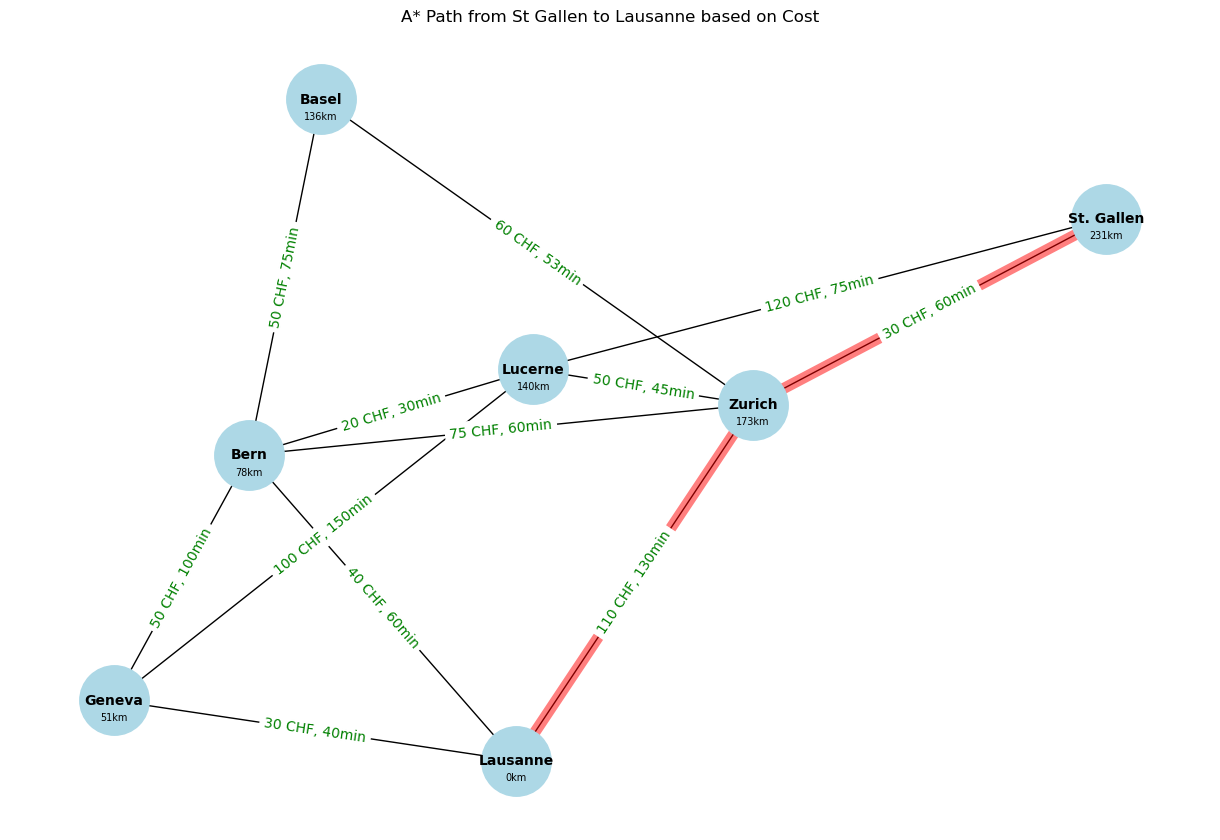

In [25]:
# Visualize the path based on cost
visualize_path(G, path_by_cost, "A* Path from St Gallen to Lausanne based on Cost")


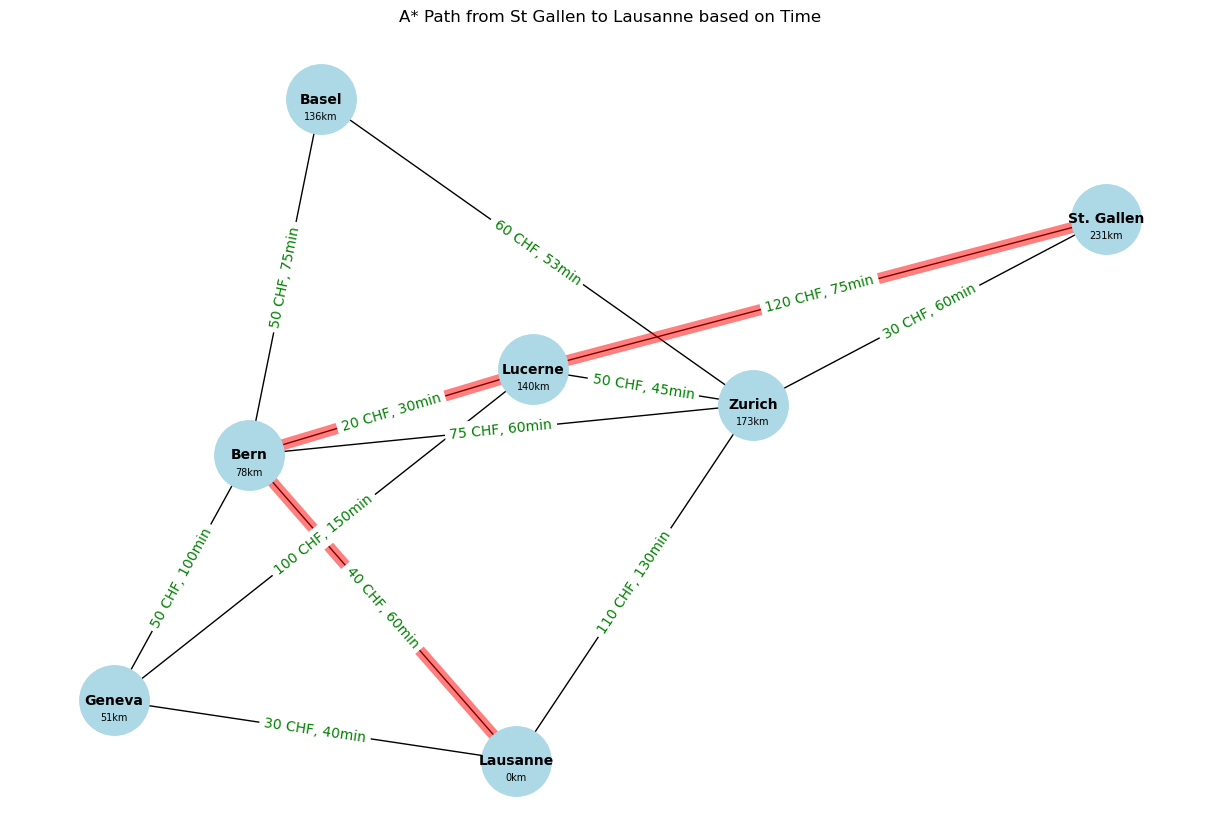

In [26]:
# Visualize the path based on time
visualize_path(G, path_by_time, "A* Path from St Gallen to Lausanne based on Time")